# Decision Tree Classifier

## For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
data = pd.read_csv("file:///home/sarthak_tyagi01/Downloads/Iris.csv")
data.head(8)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa


In [31]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Analyzing Data

[]

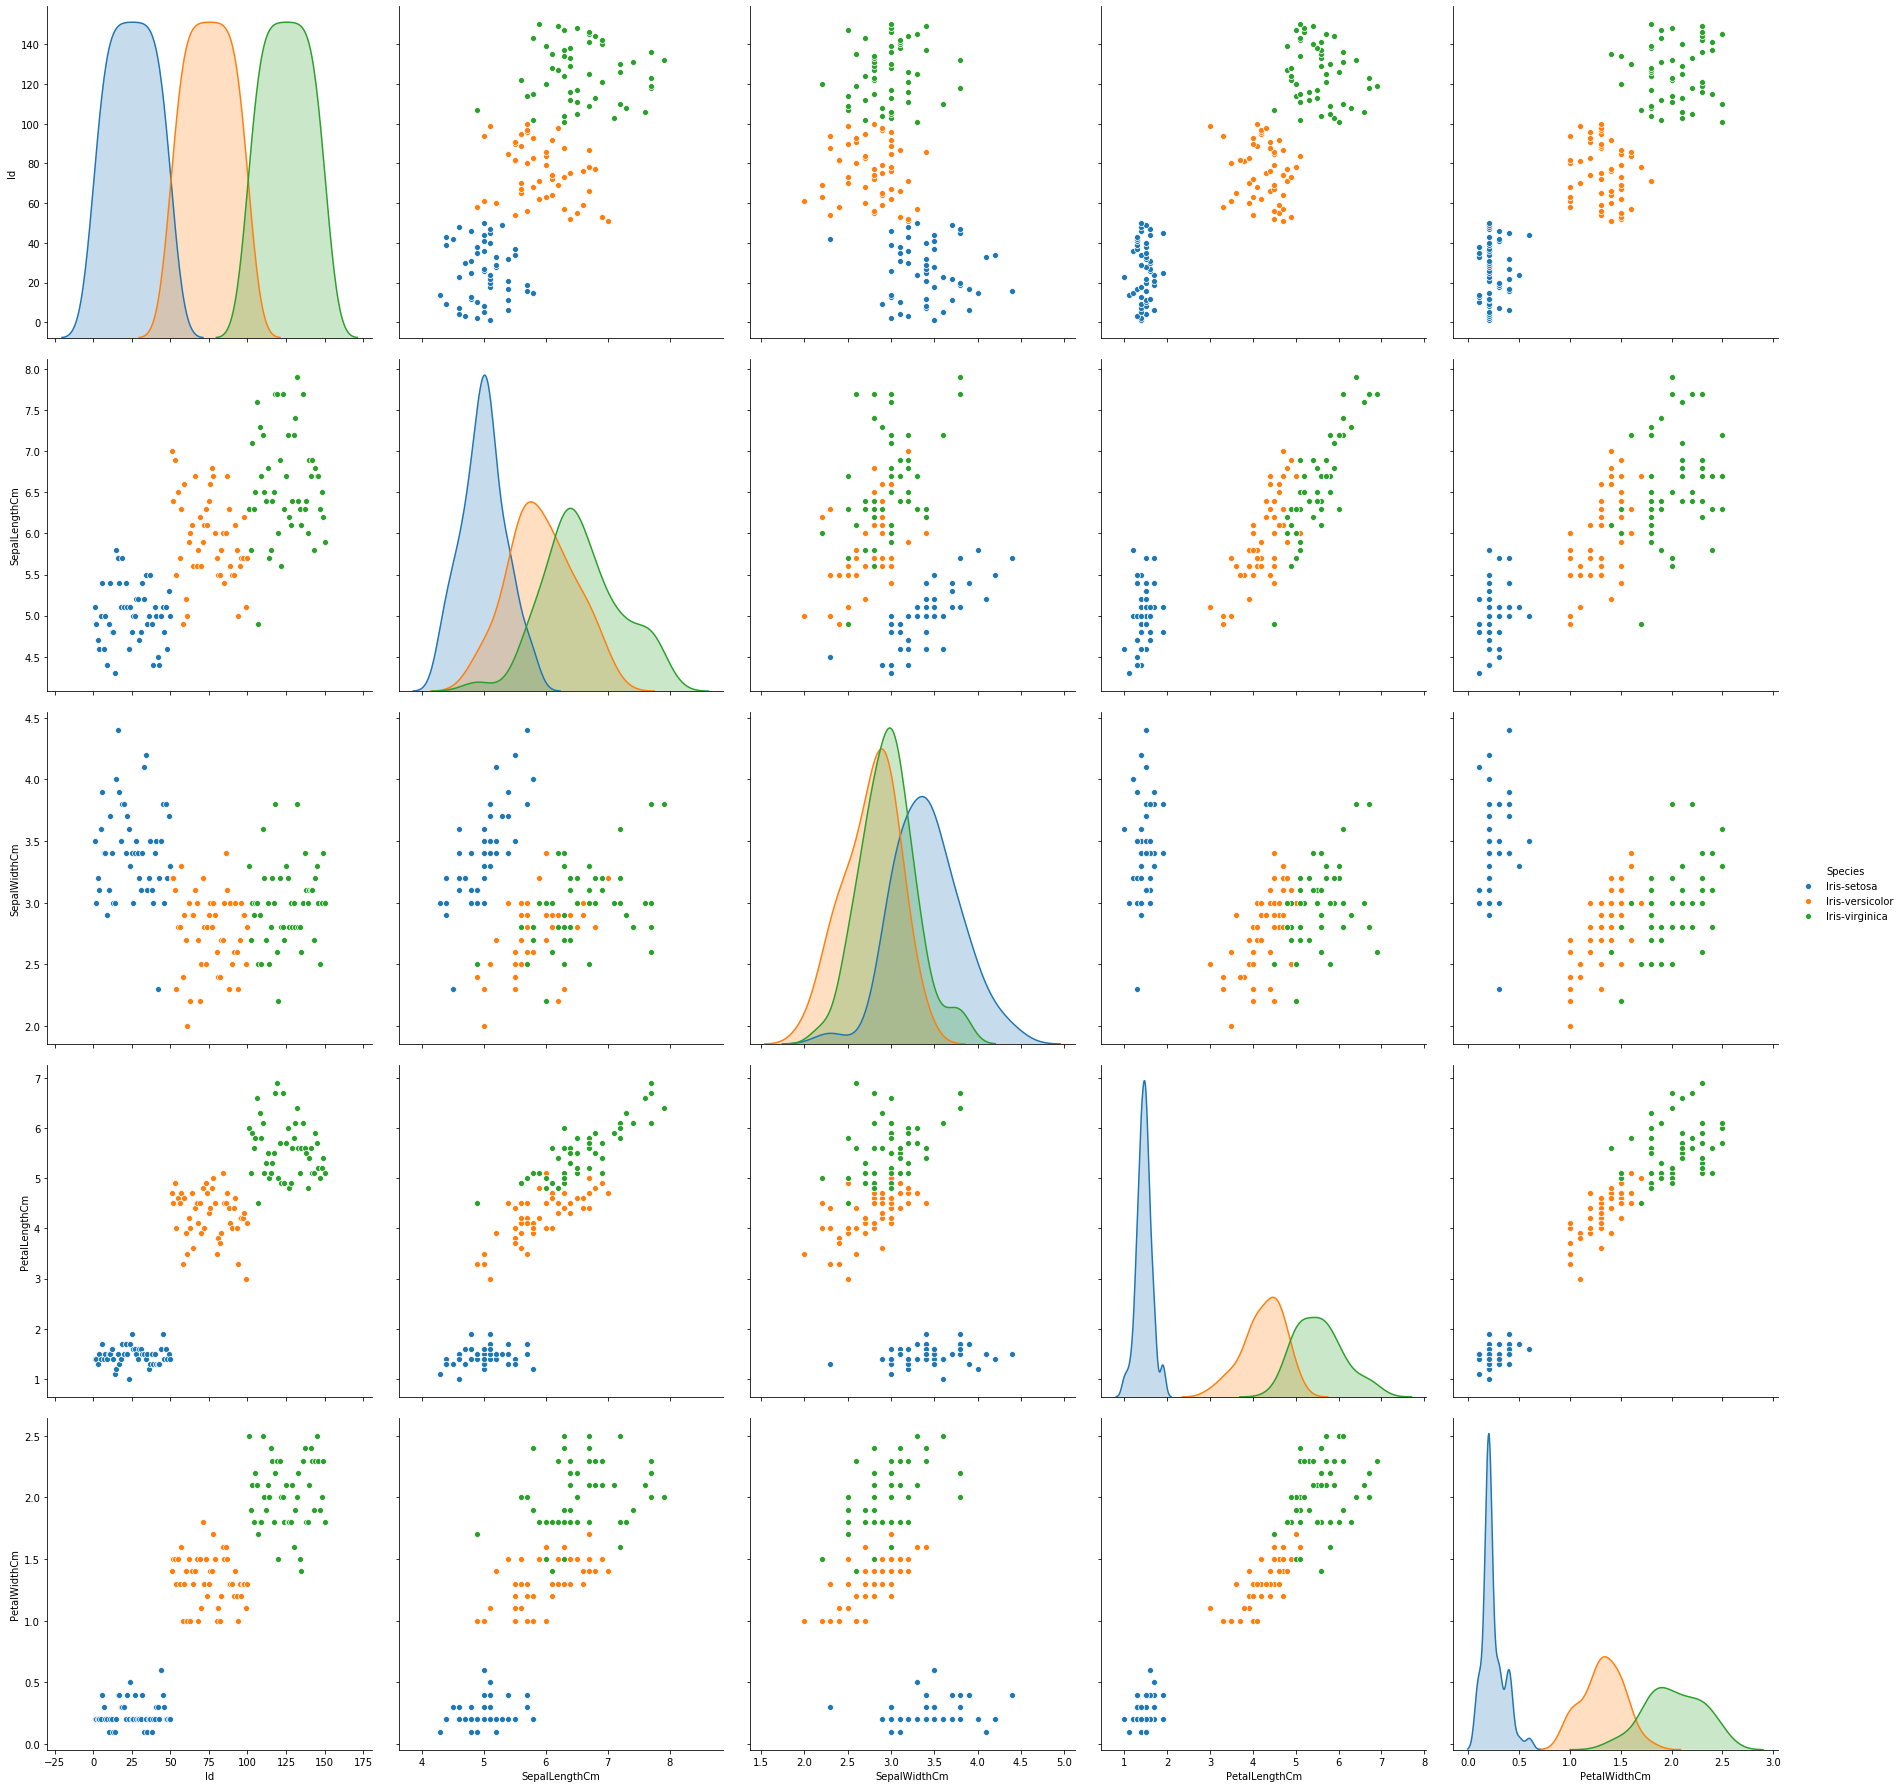

In [32]:
sns.pairplot(data,hue="Species",height= 5)
plt.plot()

[]

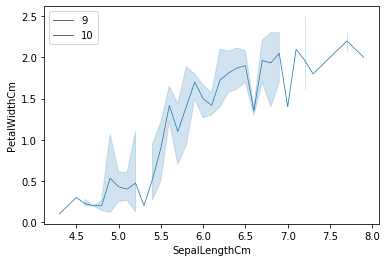

In [33]:
features = data.drop(["Species"],axis=1)
sns.lineplot(x=features["SepalLengthCm"],y=features["PetalWidthCm"], size = 10)
plt.plot()

[]

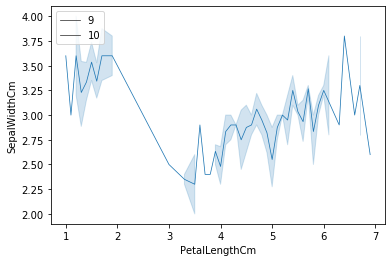

In [34]:
sns.lineplot(x=features["PetalLengthCm"],y=features["SepalWidthCm"], size = 10)
plt.plot()

## Data Wrangling

In [35]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [36]:
features = data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
features.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


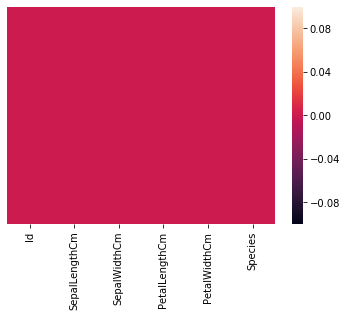

In [37]:
sns.heatmap(data.isnull(),yticklabels=False)

## Data Preprocessing

In [38]:
types = pd.get_dummies(data["Species"],drop_first=True)
types.head(10)

,Iris-versicolor,Iris-virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [39]:
from sklearn.preprocessing import LabelEncoder
cdf = LabelEncoder()
data["Species"] = cdf.fit_transform(data["Species"].astype('str'))
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
5,6,5.4,3.9,1.7,0.4,0
6,7,4.6,3.4,1.4,0.3,0
7,8,5.0,3.4,1.5,0.2,0
8,9,4.4,2.9,1.4,0.2,0
9,10,4.9,3.1,1.5,0.1,0


## Training Model

In [40]:
X = data.drop("Id",axis=1)
Y = data["Species"]

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =0.3)

In [42]:
from sklearn.tree import DecisionTreeClassifier
classify = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=3,min_samples_leaf=5)
classify.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

## Testing Model

In [43]:
result = classify.predict(X_test)
comparision = pd.DataFrame({'Actual':Y_test,'Predicted':result})
comparision.head(10)

,Actual,Predicted
104,2,2
101,2,2
96,1,1
4,0,0
128,2,2
75,1,1
88,1,1
47,0,0
17,0,0
19,0,0


## Model Evaluation

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,result)

1.0

In [45]:
from sklearn.metrics import classification_report
classification_report(Y_test,result)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        18\n           1       1.00      1.00      1.00        14\n           2       1.00      1.00      1.00        13\n\n    accuracy                           1.00        45\n   macro avg       1.00      1.00      1.00        45\nweighted avg       1.00      1.00      1.00        45\n'

## Decision Tree

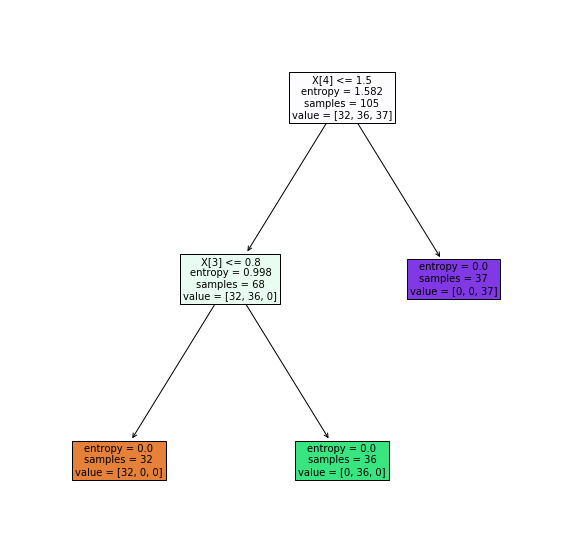

In [46]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(10, 10))
tree.plot_tree(classify, fontsize=10, filled =True)
plt.show()